## Task 3

###  TD-idf 原理

TF-IDF(Term Frequency-Inverse Document Frequency, 词频-逆文件频率). 

这是一种用于资讯检索与资讯探勘的常用加权技术。TF-IDF是一种统计方法，用以评估一字词对于一个文件集或一个语料库中的其中一份文件的重要程度。字词的重要性随着它在文件中出现的次数成正比增加，但同时会随着它在语料库中出现的频率成反比下降。

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'It is a test.',
    'NLP is good.'
]

vector = TfidfVectorizer()
X = vector.fit_transform(corpus)
print(X.toarray())
print(vector.get_feature_names())
test = [
    'a good test.',
    'thid ad ac.'
]
print(vector.transform(test).toarray())
print(vector.get_feature_names())


[[0.         0.44943642 0.6316672  0.         0.6316672 ]
 [0.6316672  0.44943642 0.         0.6316672  0.        ]]
['good', 'is', 'it', 'nlp', 'test']
[[0.70710678 0.         0.         0.         0.70710678]
 [0.         0.         0.         0.         0.        ]]
['good', 'is', 'it', 'nlp', 'test']


### 文本矩阵化

以TF-IDF特征值为权重，使TfidfTransformer，只需要将上边得到的TF-IDF结果转换为矩阵即可；

In [8]:
print(vector.transform(test).toarray())

[[0.70710678 0.         0.         0.         0.70710678]
 [0.         0.         0.         0.         0.        ]]


### 互信息的原理

互信息（Mutual Information）
正式地，两个离散随机变量 X 和 Y 的互信息可以定义为：
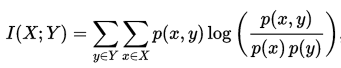

其衡量的是两个随机变量之间的相关性，即一个随机变量中包含的关于另一个随机变量的信息量。所谓的随机变量，即随机试验结果的量的表示，可以简单理解为按照一个概率分布进行取值的变量，比如随机抽查的一个人的身高就是一个随机变量。


### 利用互信息进行特征筛选

信息量：事件发生概率越高，含有的信息量就越低。
熵：事件发生的不确定性越大，熵越大。
联合熵：联合熵可以表示为两个事件的熵的并集。
条件熵：条件熵实际上是联合熵与熵的差集，也可表示为熵与互信息的差集。
互信息：互信息是用来表示变量间相互以来的程度，常用在特征选择和特征关联性等方面。
相对熵：相对熵用来描述两个分布之间的差异。
交叉熵：交叉熵常用在深度学习中目标函数优化。


In [12]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import metrics as mr
 
iris = load_iris()
x = iris.data
y = iris.target
 
x0 = x[:, 0]
x1 = x[:, 1]
x2 = x[:, 2]
x3 = x[:, 3]
 
# 计算x和y的互信息
print(mr.mutual_info_score(x0, y))
print(mr.mutual_info_score(x1, y))
print(mr.mutual_info_score(x2, y))
print(mr.mutual_info_score(x3, y))

0.6078468394475832
0.35810955263431954
1.002510220562348
0.9952885384500019


参考链接：
https://blog.csdn.net/zh11403070219/article/details/88284390
https://blog.csdn.net/yyy430/article/details/88249709#%E4%BA%92%E4%BF%A1%E6%81%AF%E7%9A%84%E5%8E%9F%E7%90%86